Coleta de Dados

In [115]:
import pandas as pd

column_names = [
    "ID", "Diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
    "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
    "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

# Carrega os dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None, names=column_names)

# Exibe as primeiras linhas
print(df.head())

         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Entendo o Conjunto de Dados

In [116]:
print("Primeiras 5 linhas:")
print(df.head())

print("\n Informações sobre o dataset:")
print(df.info())


Primeiras 5 linhas:
         ID Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perim

In [117]:
# Conta quantos IDs únicos existem
unique_ids = df['ID'].nunique()

print(f"Quantidade de IDs únicos: {unique_ids}")

duplicated_ids = df['ID'].duplicated().sum()
print(f"IDs duplicados encontrados: {duplicated_ids}")

Quantidade de IDs únicos: 569
IDs duplicados encontrados: 0


In [118]:
df = df.drop(columns=['ID'])

Label Encoding Binário

In [119]:
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})


**Análise Exploratória**

In [120]:
diagnostico_percentual = df['Diagnosis'].value_counts(normalize=True) * 100
print(diagnostico_percentual)


Diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64


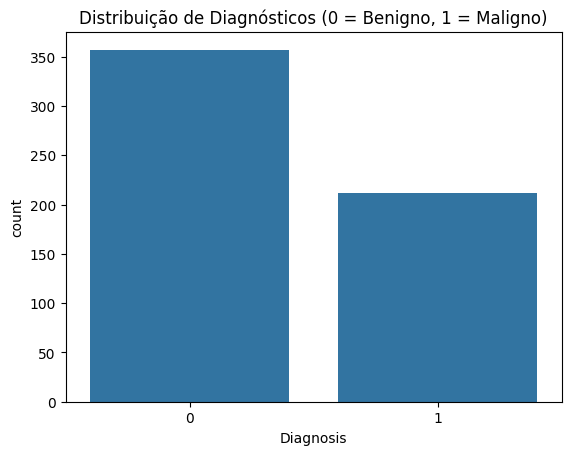

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Diagnosis', data=df)
plt.title('Distribuição de Diagnósticos (0 = Benigno, 1 = Maligno)')
plt.show()


In [122]:

print("\n Estatísticas descritivas:")
print(df.describe())


 Estatísticas descritivas:
        Diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.0

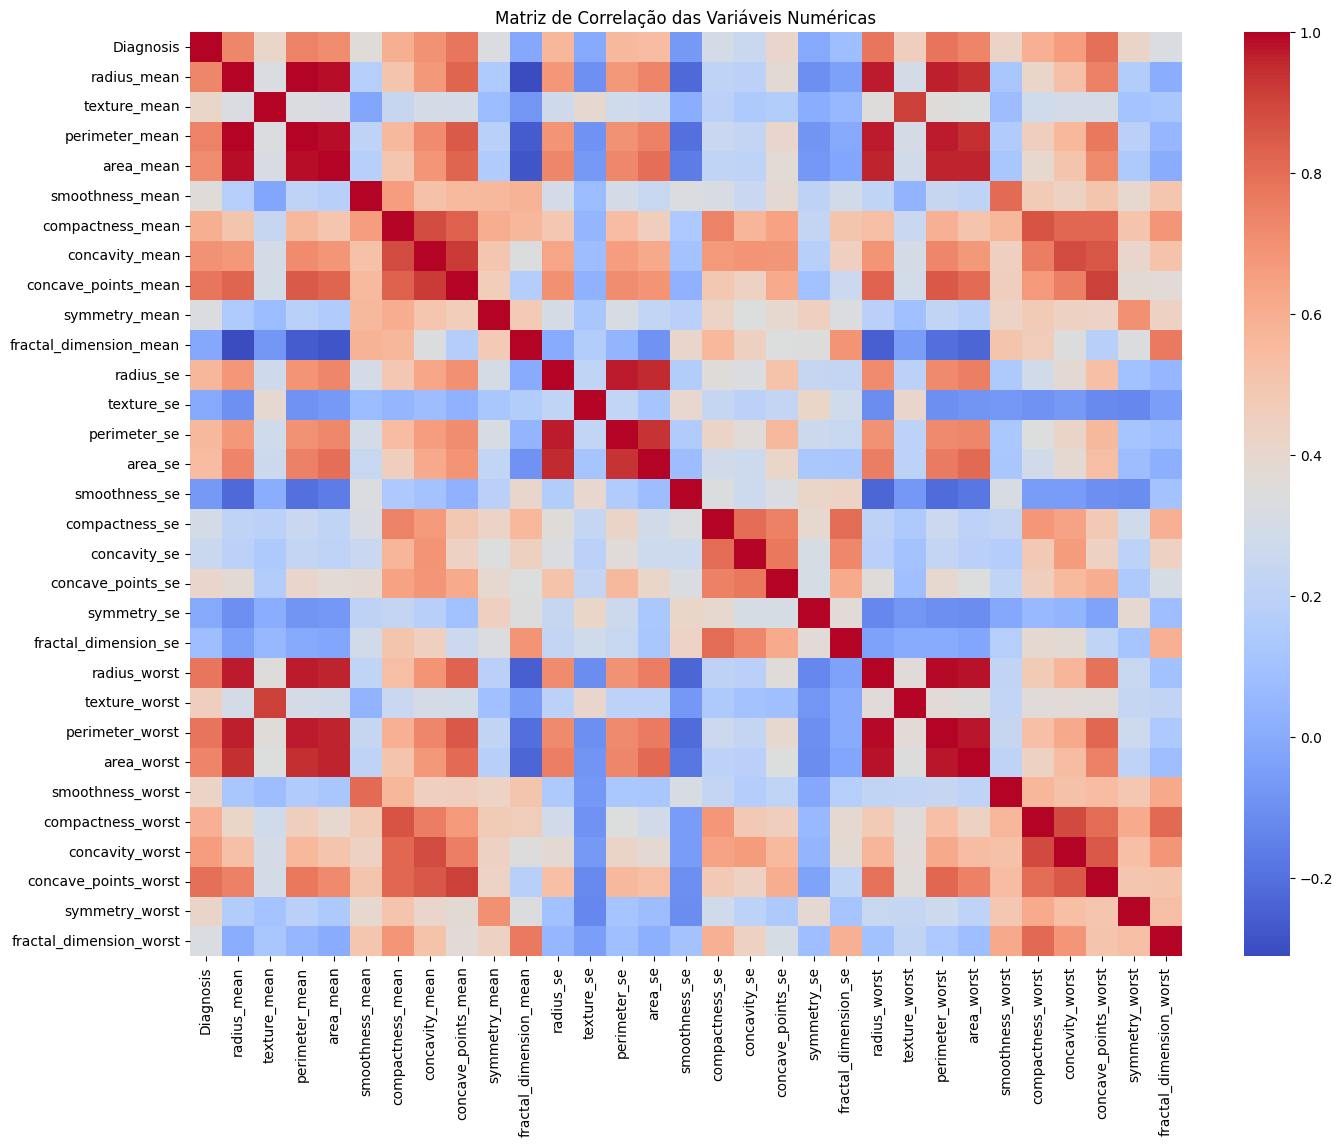

In [123]:
df_numerical = df.drop(columns=['Diagnosis']) 

plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

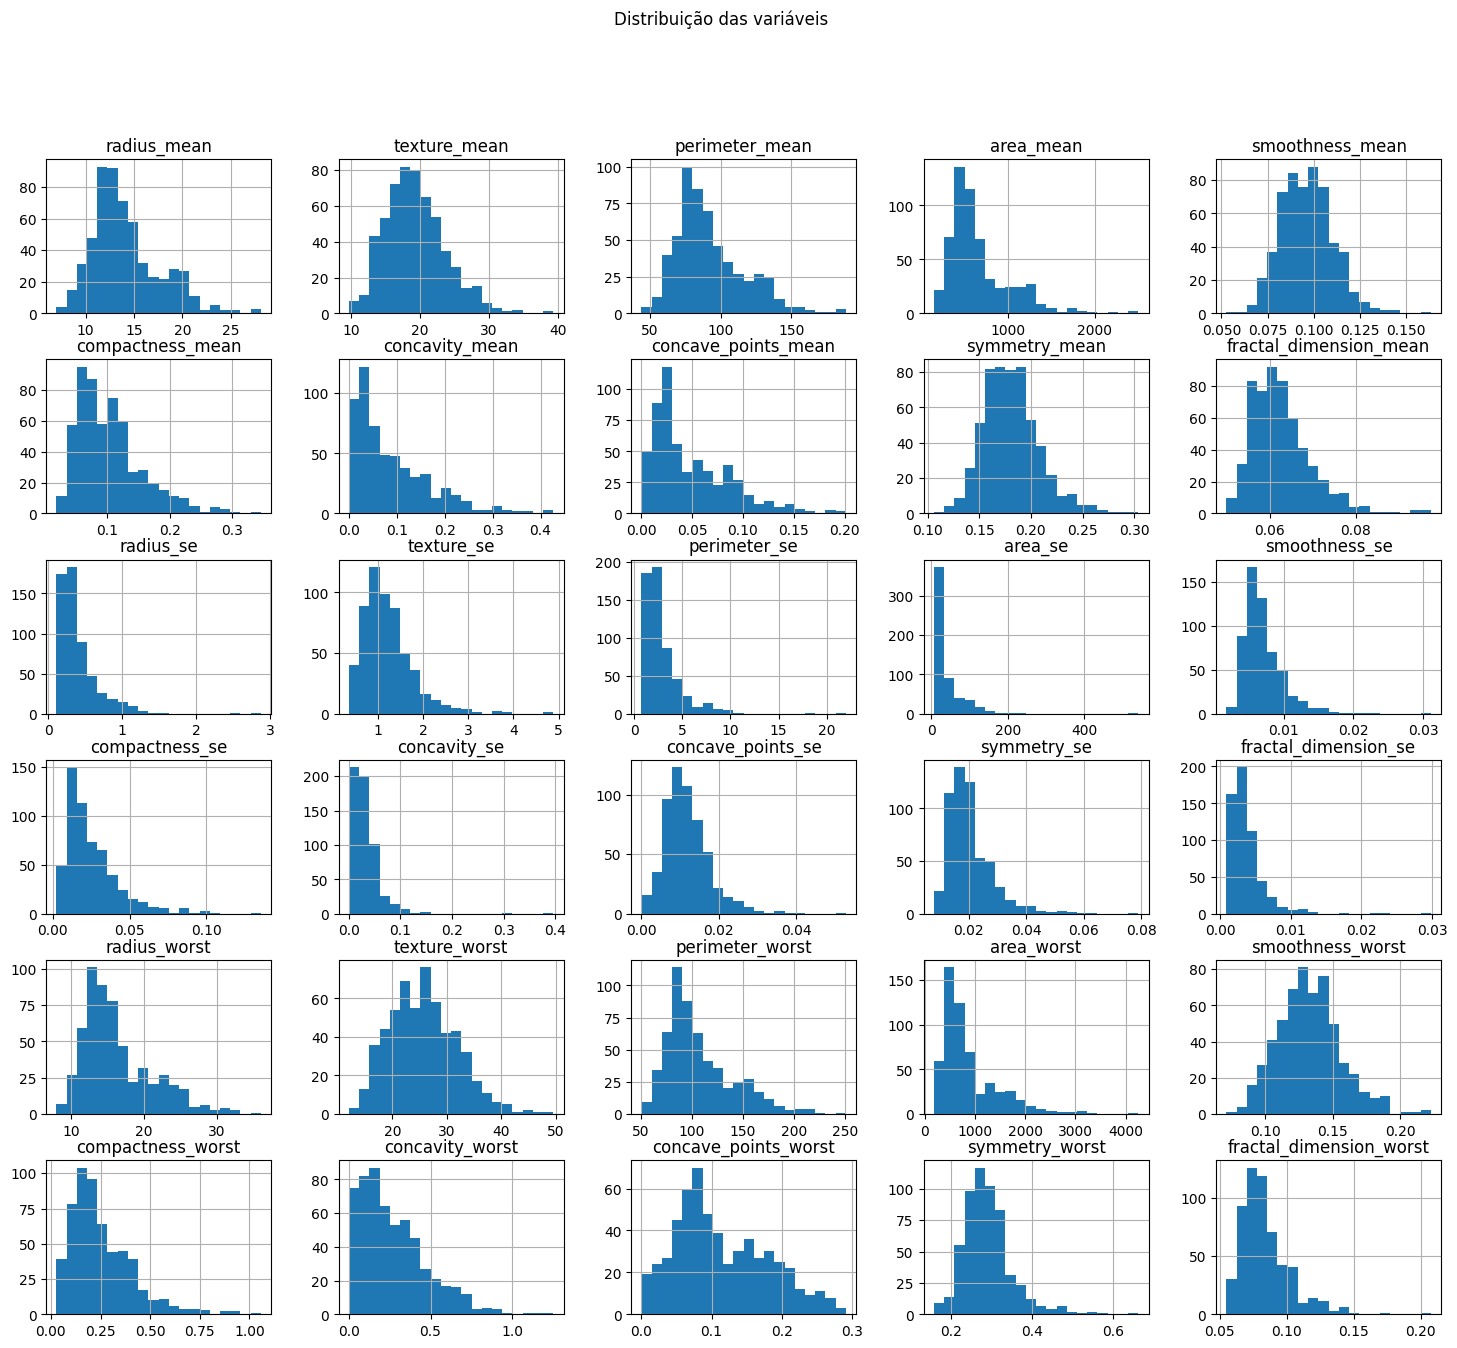

In [124]:
df_numerical.hist(bins=20, figsize=(18, 15))
plt.suptitle('Distribuição das variáveis')
plt.show()


In [125]:
cor = df.corr()['Diagnosis'].sort_values(ascending=False)
print(cor)


Diagnosis                  1.000000
concave_points_worst       0.793566
perimeter_worst            0.782914
concave_points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave_points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

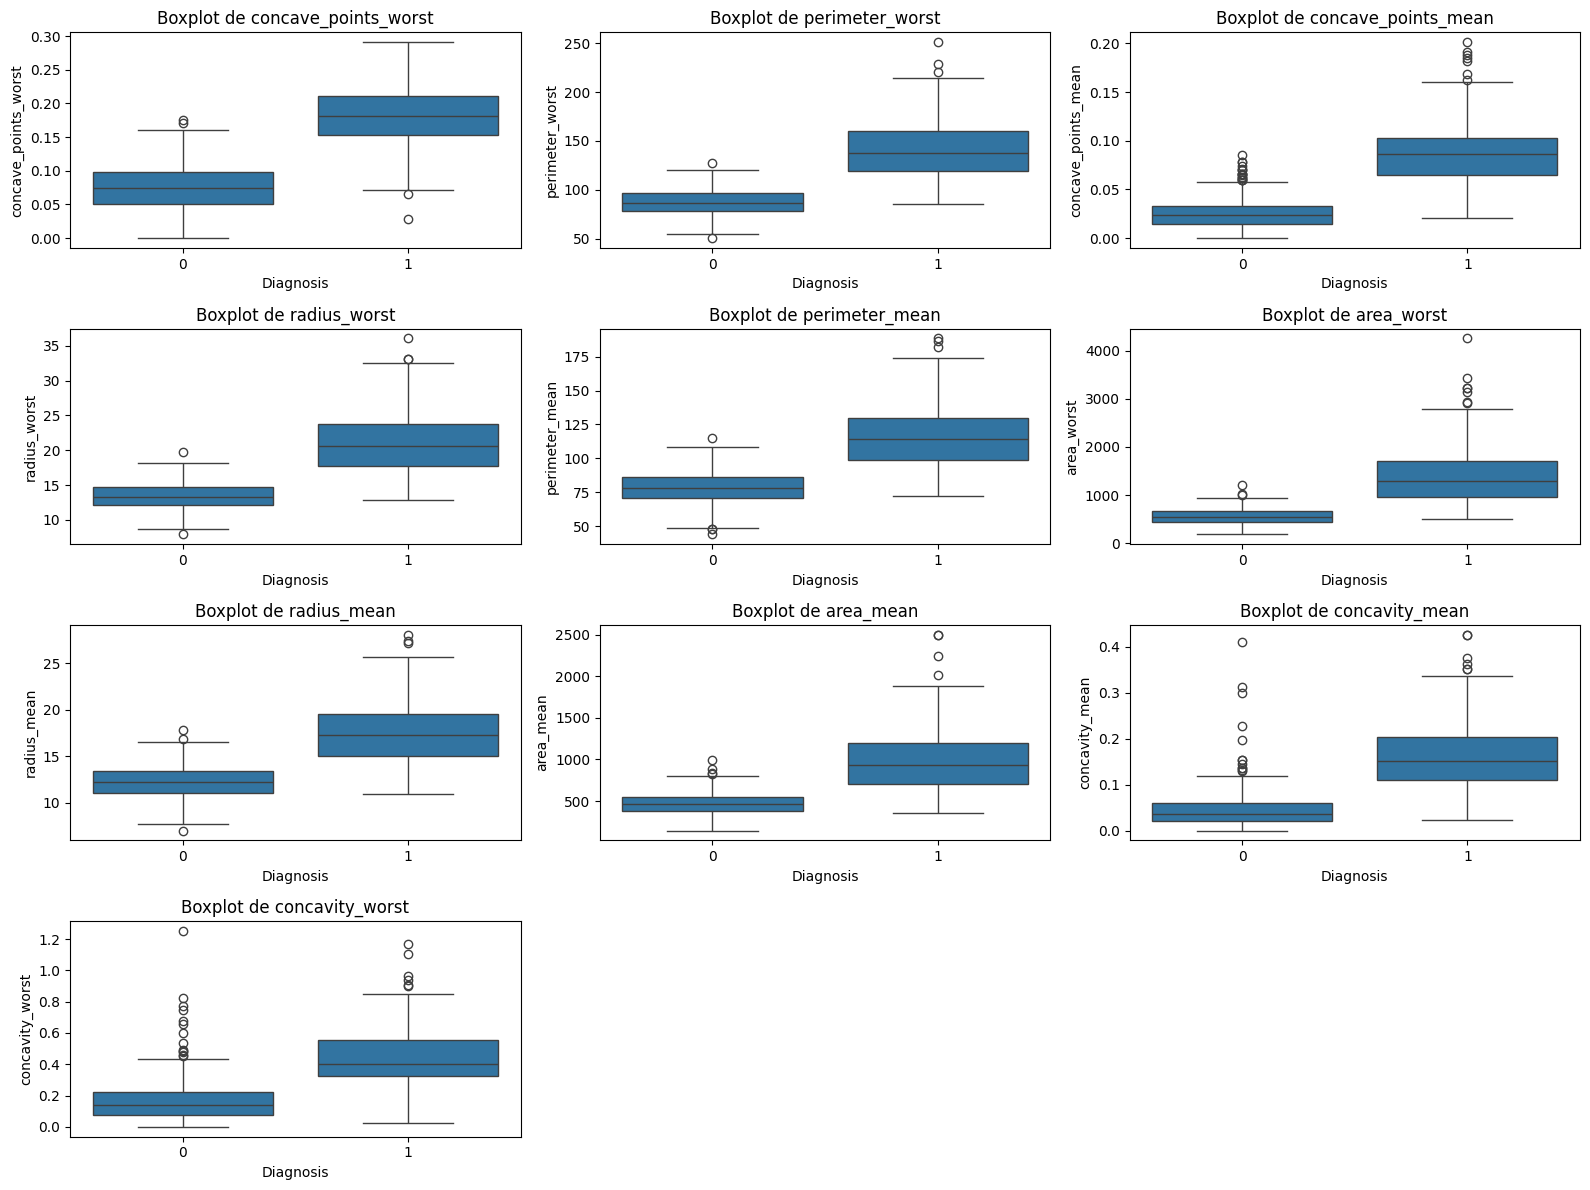

In [126]:
boxplot_vars = [
    'concave_points_worst', 'perimeter_worst', 'concave_points_mean',
    'radius_worst', 'perimeter_mean', 'area_worst',
    'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst'
]

plt.figure(figsize=(16, 12))
for i, col in enumerate(boxplot_vars, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Diagnosis', y=col, data=df)
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


Transformação logarítmica

In [128]:
import numpy as np

log_vars = [
    'area_mean', 'area_se', 'area_worst',
    'radius_mean', 'radius_se', 'radius_worst',
    'perimeter_mean', 'perimeter_se', 'perimeter_worst',
    'concavity_mean', 'concavity_se', 'concavity_worst',
    'compactness_mean', 'compactness_se', 'compactness_worst',
    'concave_points_mean', 'concave_points_se', 'concave_points_worst'
]

df_log = df.copy()
for col in log_vars:
    df_log[col] = np.log1p(df_log[col])

In [129]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_log.copy()
features_to_scale = df_scaled.select_dtypes(include=[np.number]).columns.drop('Diagnosis')
scaler = StandardScaler()
df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])




In [130]:
df_scaled.head()


,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.138030,-2.073335,1.281628,1.130319,1.568466,3.150675,2.567947,2.487638,2.217515,...,1.764045,-1.359293,2.022158,1.794344,1.307686,2.479386,2.003224,2.207318,2.750622,1.937015
1,1,1.711783,-0.353632,1.597721,1.713327,-0.826962,-0.481575,0.011104,0.571874,0.001392,...,1.706795,-0.369203,1.502321,1.737118,-0.375612,-0.411700,-0.077623,1.095013,-0.243890,0.281190
2,1,1.524183,0.456187,1.509470,1.511457,0.942210,1.076890,1.393265,2.021815,0.939685,...,1.490832,-0.023974,1.362620,1.493444,0.527407,1.146233,0.929353,1.900749,1.152255,0.201391
3,1,-0.774335,0.253732,-0.550424,-0.843470,3.283553,3.256221,1.908415,1.460738,2.867383,...,-0.179580,0.133984,-0.130272,-0.494860,3.394275,3.449402,1.907919,2.099822,6.046041,4.935010
4,1,1.652935,-1.151816,1.663405,1.667470,0.280372,0.569623,1.400416,1.438255,-0.009560,...,1.326223,-1.466770,1.355825,1.346061,0.220556,-0.280508,0.700235,0.751489,-0.868353,-0.397100


**Árvore de Decisão**

In [131]:
selected_features = [
    'concave_points_worst',
    'perimeter_worst',
    'concave_points_mean',
    'radius_worst',
    'perimeter_mean',
    'area_worst',
    'radius_mean',
    'area_mean',
    'concavity_mean',
    'concavity_worst'
]


In [132]:

variaveis = [
    'concave_points_worst', 'perimeter_worst', 'concave_points_mean',
    'radius_worst', 'perimeter_mean', 'area_worst',
    'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst'
]

# Criar uma cópia do DataFrame original
df_filtrado = df.copy()

# Função para detectar outliers usando IQR
def detectar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return (df[coluna] < limite_inferior) | (df[coluna] > limite_superior)

# Dicionário para armazenar contagem de outliers
outliers_por_variavel = {}

# Diagnóstico deve estar na coluna "Diagnosis" (0 = benigno, 1 = maligno)
for var in variaveis:
    outliers = detectar_outliers_iqr(df_filtrado, var)
    total_outliers = outliers.sum()
    outliers_0 = df_filtrado[outliers & (df_filtrado['Diagnosis'] == 0)].shape[0]
    outliers_1 = df_filtrado[outliers & (df_filtrado['Diagnosis'] == 1)].shape[0]
    outliers_por_variavel[var] = {
        'Total': total_outliers,
        'Classe 0': outliers_0,
        'Classe 1': outliers_1
    }

# Mostrar resumo dos outliers
outliers_df = pd.DataFrame(outliers_por_variavel).T
print("Resumo de outliers detectados (por IQR):")
print(outliers_df)

# (Opcional) Remover linhas com outliers em QUALQUER uma das variáveis
for var in variaveis:
    outliers = detectar_outliers_iqr(df_filtrado, var)
    df_filtrado = df_filtrado[~outliers]

print(f"\nNúmero de linhas após remoção de outliers: {df_filtrado.shape[0]}")  

Resumo de outliers detectados (por IQR):
                      Total  Classe 0  Classe 1
concave_points_worst      0         0         0
perimeter_worst          15         0        15
concave_points_mean      10         0        10
radius_worst             17         0        17
perimeter_mean           13         0        13
area_worst               35         0        35
radius_mean              14         0        14
area_mean                25         0        25
concavity_mean           18         3        15
concavity_worst          12         2        10

Número de linhas após remoção de outliers: 437


**Resultado Após retirar outliers**

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.84      0.78      0.81        27

    accuracy                           0.92       132
   macro avg       0.89      0.87      0.88       132
weighted avg       0.92      0.92      0.92       132



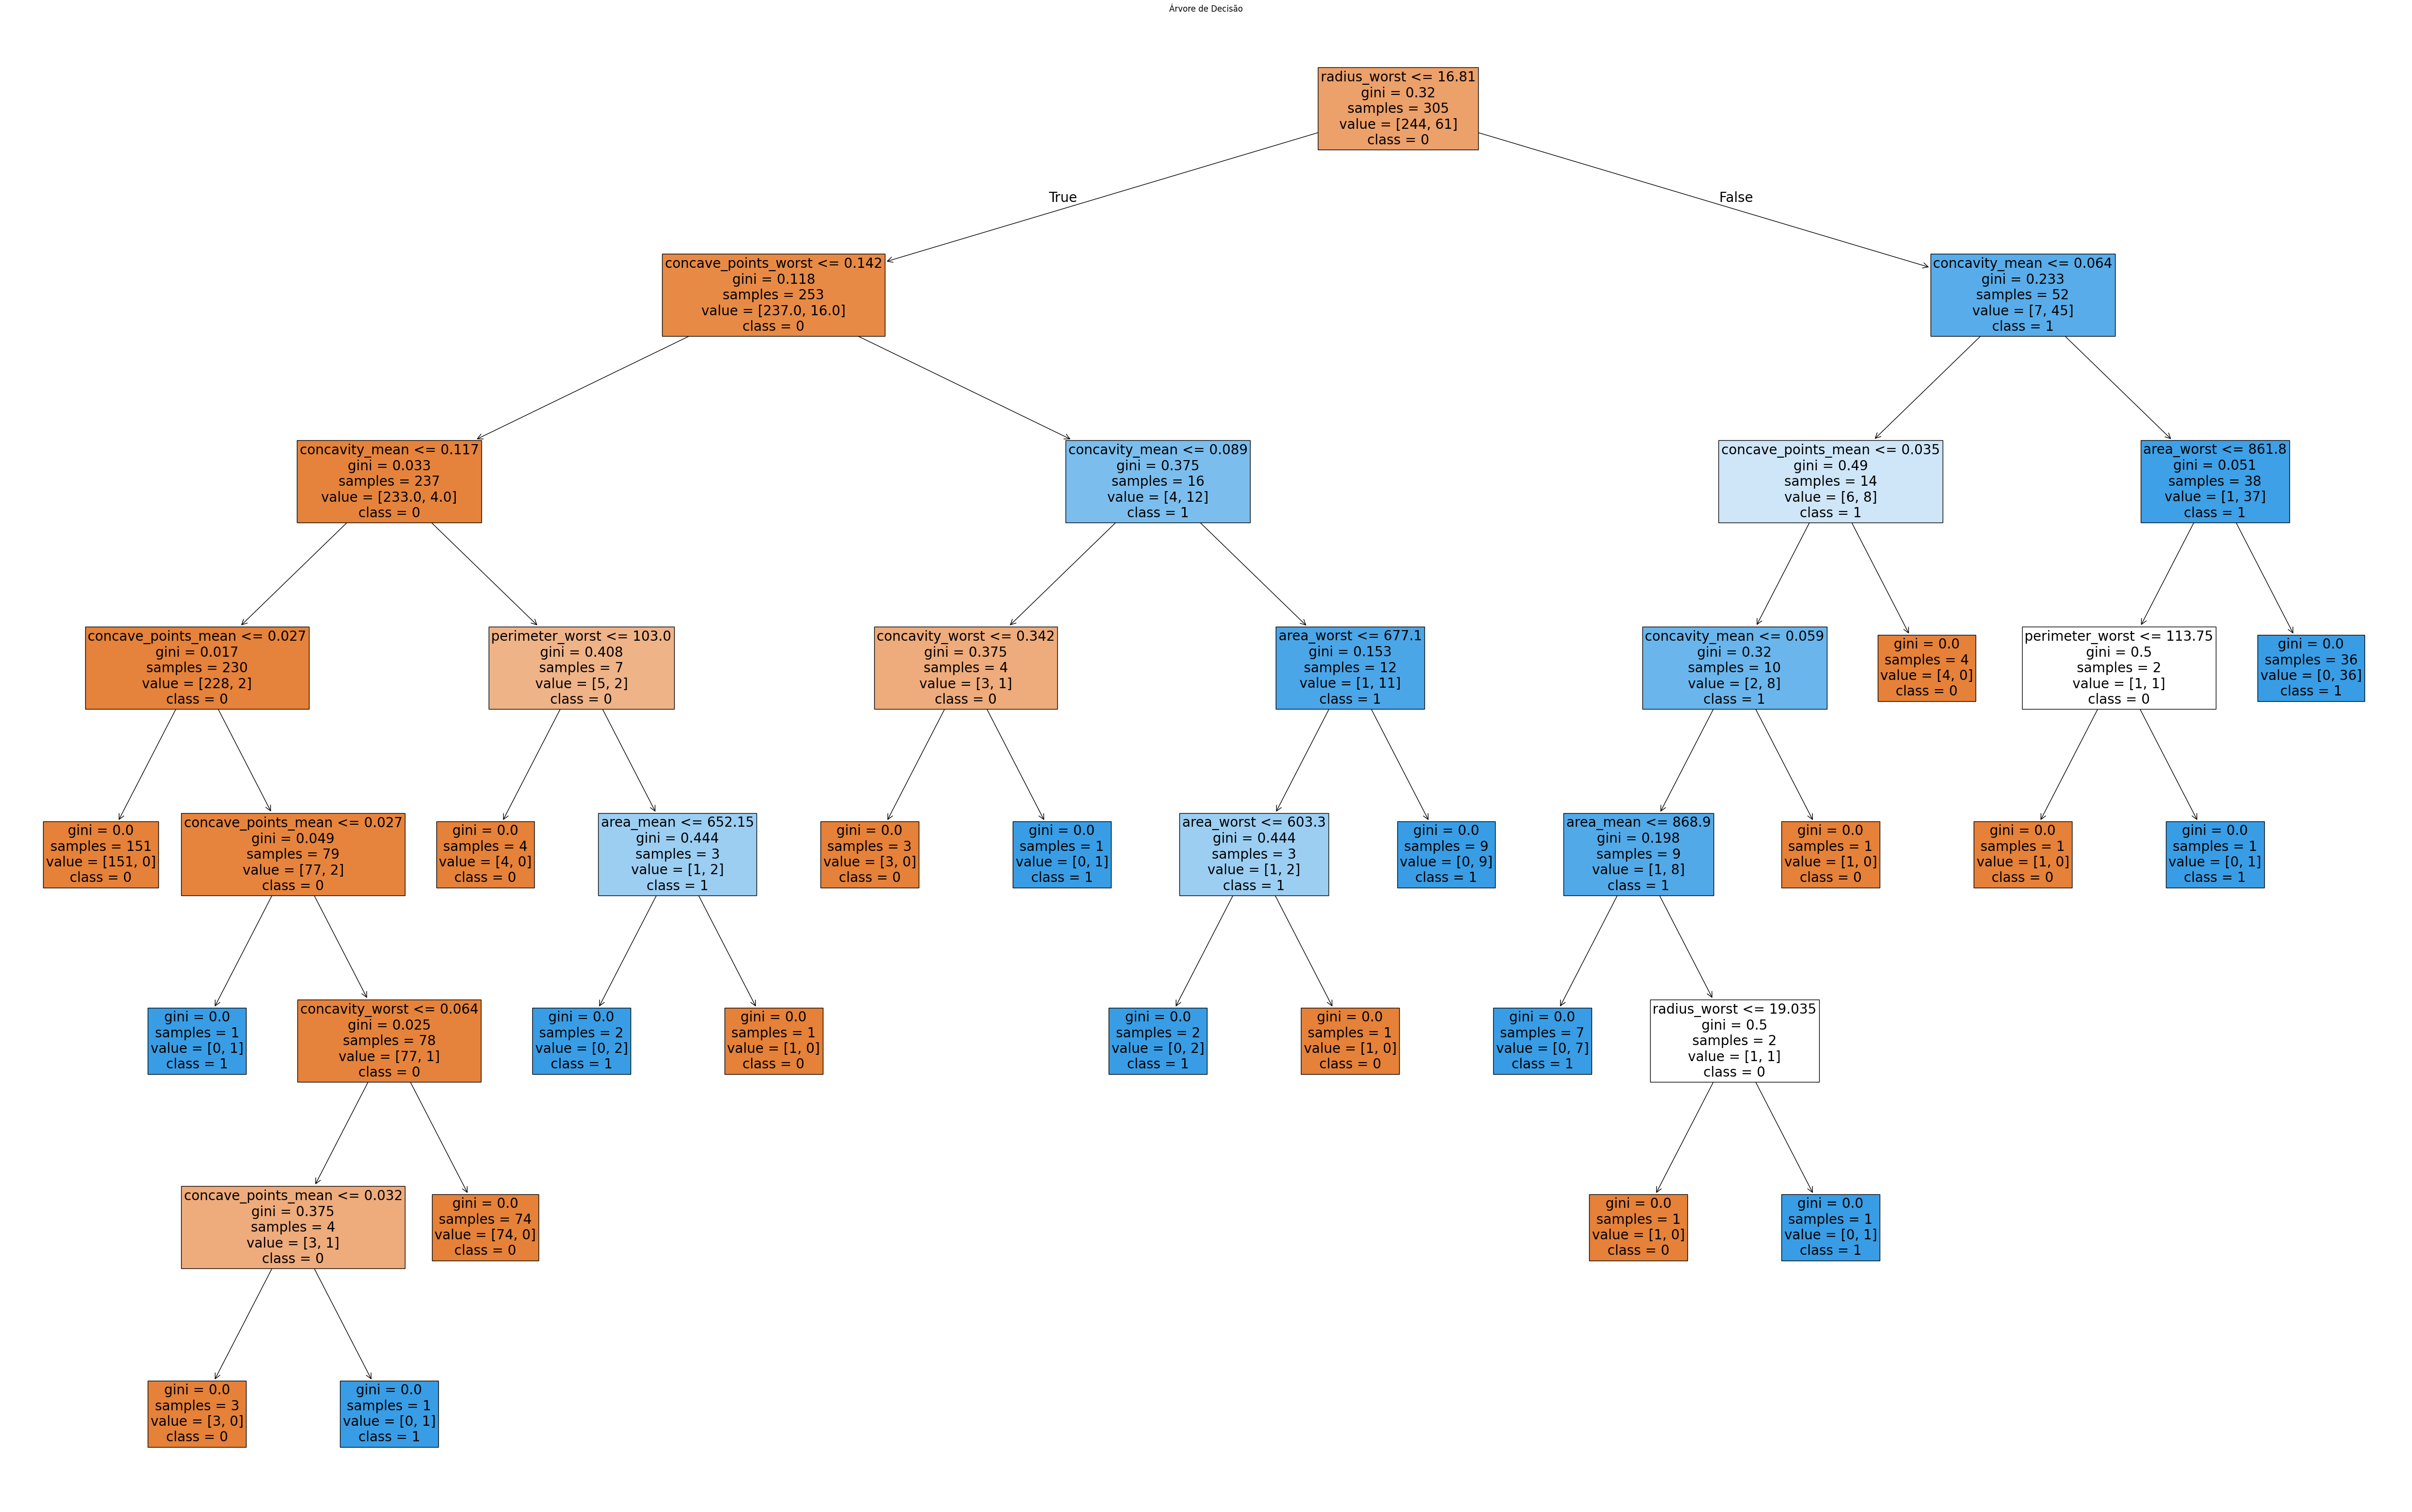

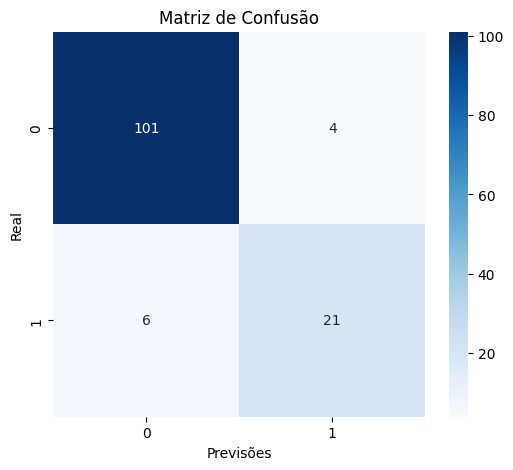

In [141]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df_filtrado[selected_features]
y = df_filtrado['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,  random_state=42)

clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(64, 40))
class_names = sorted(y.unique().astype(str))  
plot_tree(clf, filled=True, feature_names=selected_features, class_names=class_names,fontsize=20)
plt.title("Árvore de Decisão")
plt.show()

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.show()



**Critério de Gini**

Melhor valor de ccp_alpha: 0.00248172322729121
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       107
           1       0.95      0.84      0.89        64

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



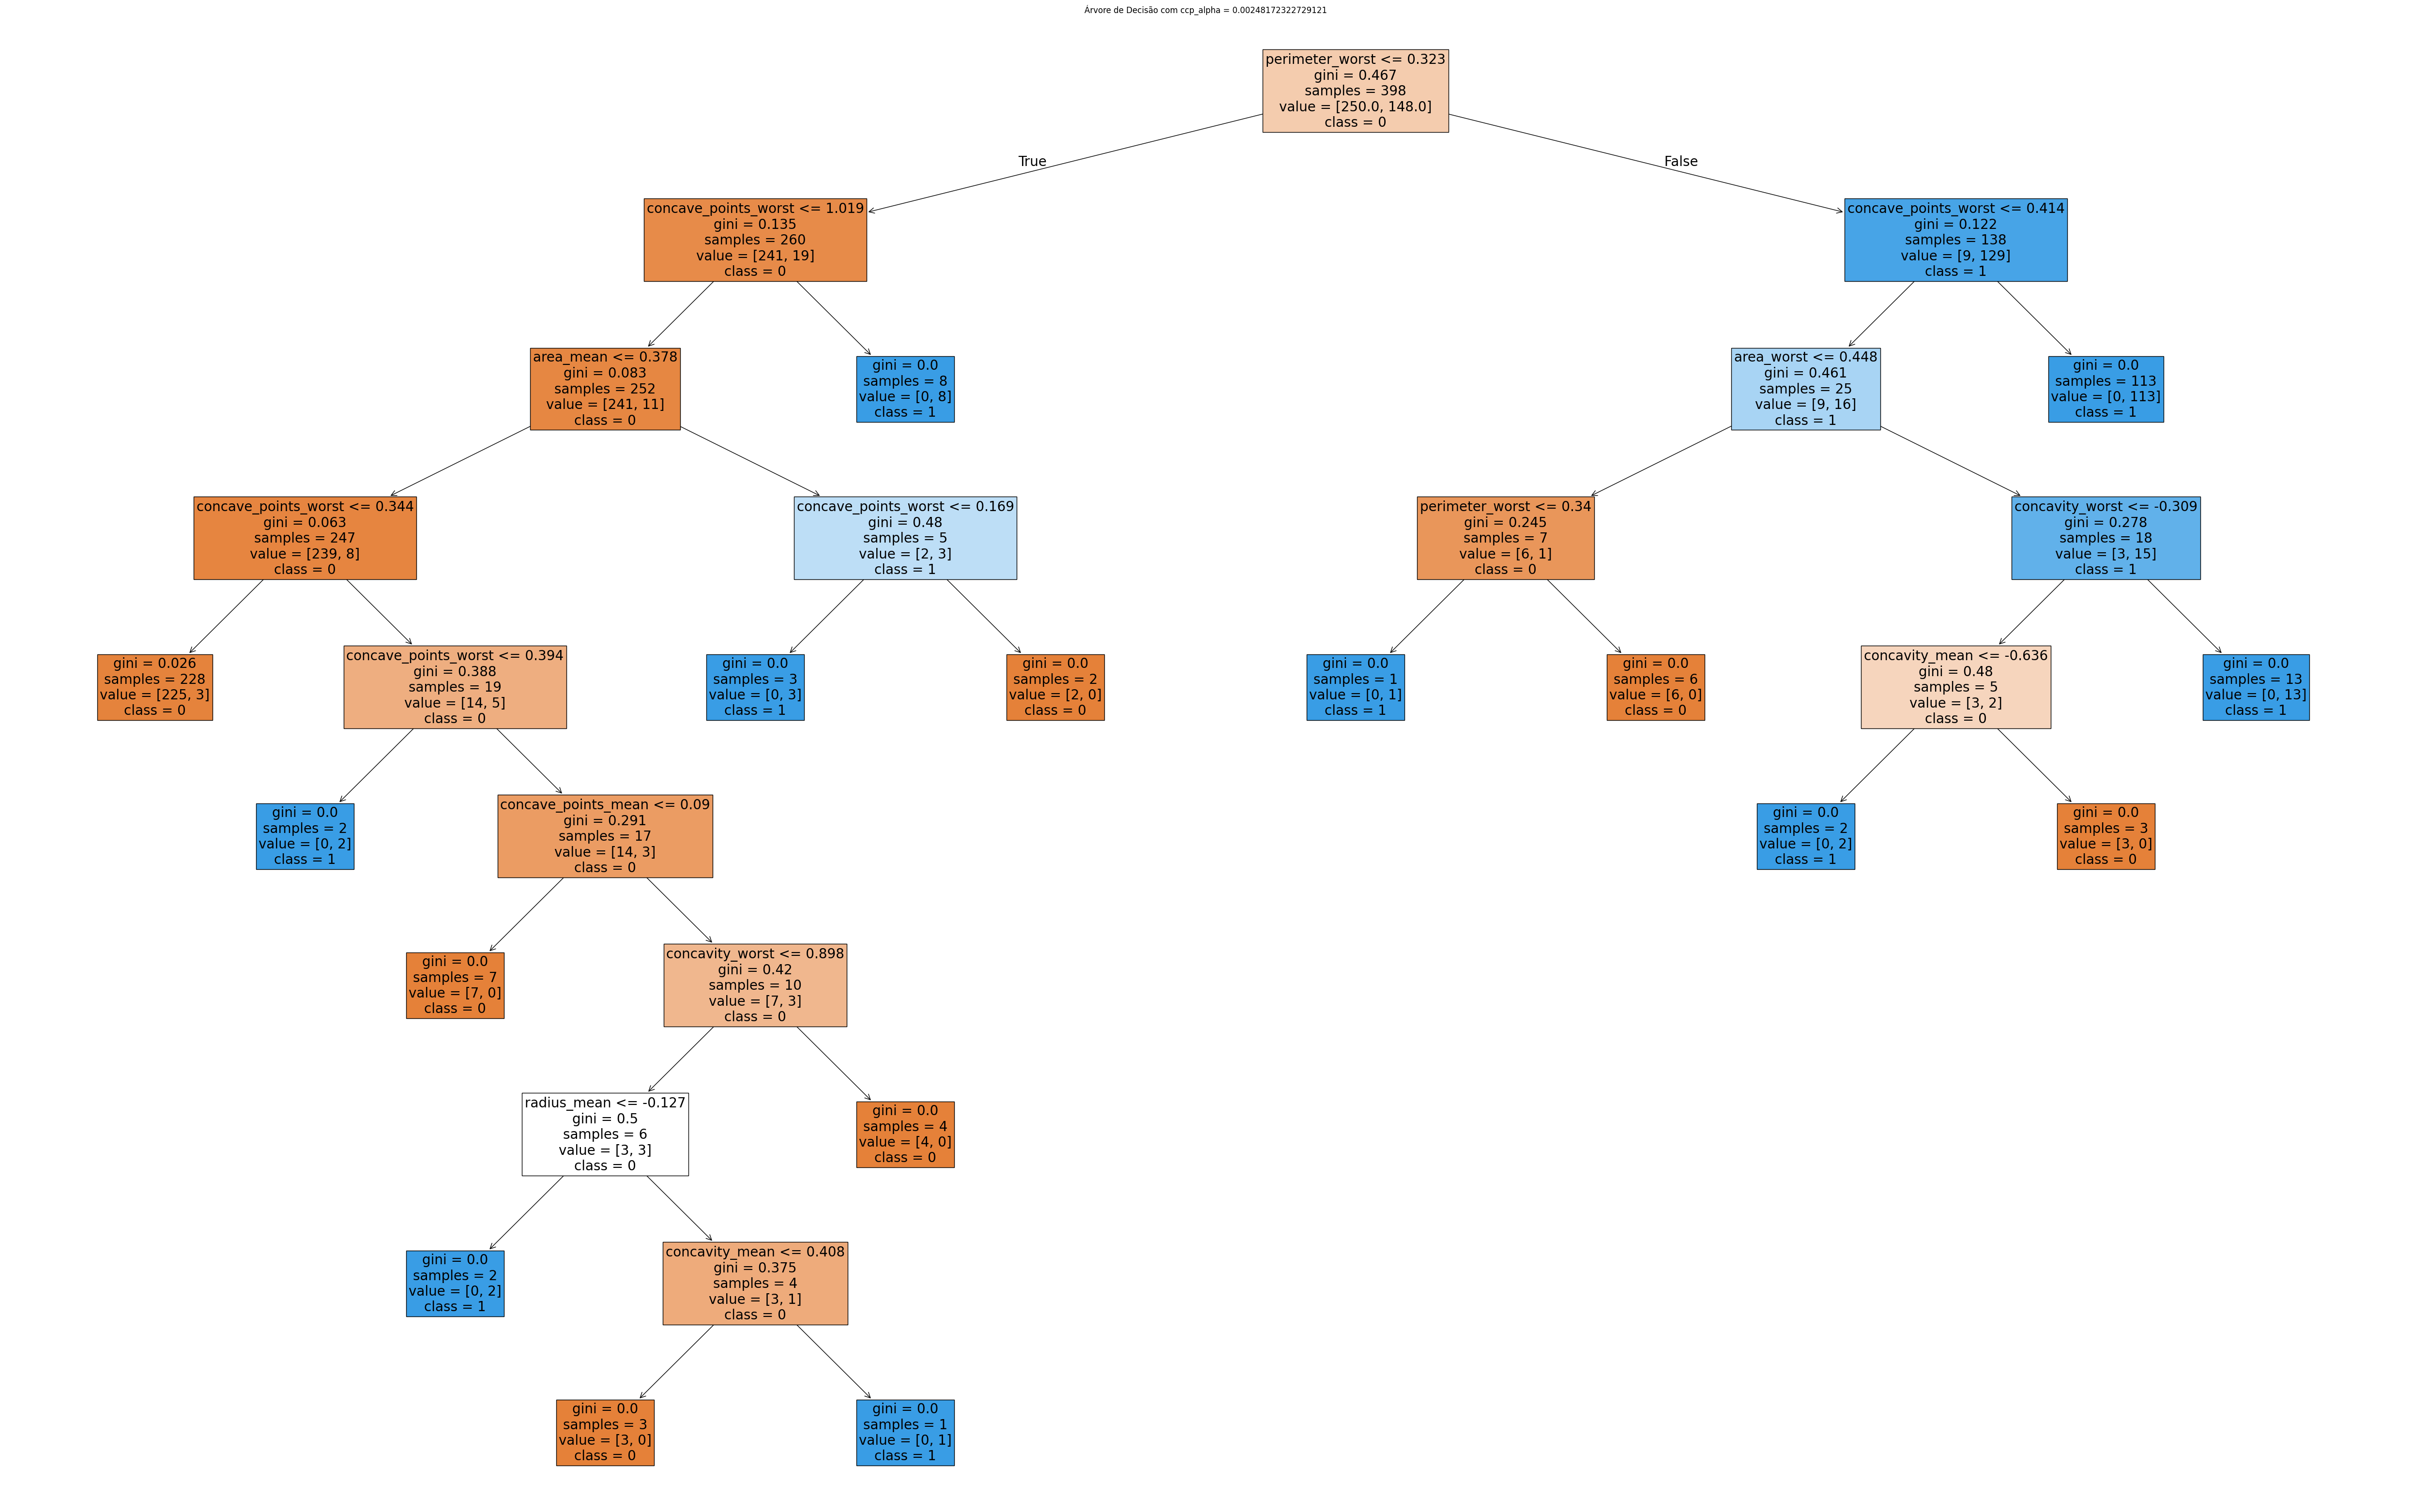

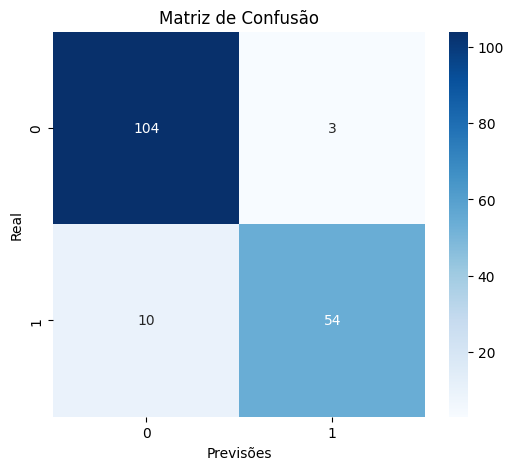

In [144]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Divisão dos dados
X = df_scaled[selected_features]
y = df_scaled['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Criação do modelo de árvore de decisão
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Ajustar o modelo para os dados de treino
clf.fit(X_train, y_train)

# Calculando os valores de ccp_alpha (parâmetro de poda)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Treinamento de árvores para diferentes valores de ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf_temp = DecisionTreeClassifier(criterion='gini', ccp_alpha=ccp_alpha, random_state=42)
    clf_temp.fit(X_train, y_train)
    clfs.append(clf_temp)

# Avaliação dos modelos
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Encontrando o melhor modelo (o que tem a melhor pontuação de teste)
best_alpha_index = test_scores.index(max(test_scores))
best_clf = clfs[best_alpha_index]
best_ccp_alpha = ccp_alphas[best_alpha_index]

# Predições usando o melhor modelo
y_pred = best_clf.predict(X_test)

# Exibindo o relatório de classificação
print(f"Melhor valor de ccp_alpha: {best_ccp_alpha}")
print(classification_report(y_test, y_pred))

# Plotando a árvore de decisão do melhor modelo
plt.figure(figsize=(64, 40))
class_names = sorted(y.unique().astype(str))
plot_tree(best_clf, filled=True, feature_names=selected_features, class_names=class_names, fontsize=20)
plt.title(f"Árvore de Decisão com ccp_alpha = {best_ccp_alpha}")
plt.show()

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Real")
plt.show()
